**<div align="center"> M22AI660 VIGNESH PITCHAIAH </div>**



**<div align="center"> Sampel Data </div>**



| x1  | x2   | Class |
| --- | ---- | ----- |
| 1   | 1    | +1    |
| -1  | -1   | -1    |
| 0   | 0.5  | -1    |
| 0.1 | 0.5  | -1    |
| 0.2 | 0.2  | +1    |
| 0.9 | 0.5  | +1    |




#  Visualizing the data 


In [ ]:
import matplotlib.pyplot as plt

X = [[1, 1], [-1, -1], [0, 0.5], [0.1, 0.5], [0.2, 0.2], [0.9, 0.5]]
Y = [1, -1, -1, -1, 1, 1]

for i in range(len(X)):
    if Y[i] == 1:
        plt.plot(X[i][0], X[i][1], 'bo')
    elif Y[i] == -1:
        plt.plot(X[i][0], X[i][1], 'or')

plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Training Samples')

plt.show()

# 1. Normalizing the data using Mean Centring and using w +/- X

* Algorithm converges during 9th Iteration
* The equation of the decision boundary is: (1.7)x_1 + (-0.2)*x_2 + (0.0)*x_2= 0
* I have added mean centering though Bias term has been intoduced because I learnt that it can make it easier to interpret the weights of the model as the impact of each feature on the output, and the weights will not be confounded by the mean of each feature. Additionally, mean centering can improve the numerical stability of the algorithm. 
* Reference 
     - Rosenblatt, F. (1958). The perceptron: A probabilistic model for information storage and organization in the brain. Psychological Review, 65(6), 386–408. https://doi.org/10.1037/h0042519)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

class Perceptron:
    def __init__(self, X, y, max_iter=50):
        self.X = self.mean_centering(X)
        self.X = np.concatenate((self.X, np.ones((len(X), 1))), axis=1)
        self.y = y
        self.max_iter = max_iter
        self.w = np.array([1.0, 1.0, 0.0])

    def mean_centering(self, X):
        X_mean = np.round(np.mean(X, axis=0), 2)
        return X - X_mean

    def activation_function(self, y_hat):
        if y_hat >= 0:
            return 1
        else:
            return -1
    def predict(self, X):
        X = np.concatenate((X, np.ones((len(X), 1))), axis=1)
        y_hat = np.dot(X, self.w)
        y_hat[y_hat >= 0] = 1
        y_hat[y_hat < 0] = -1
        return y_hat

    def accuracy(self, X, y):
        y_pred = self.predict(X)
        return np.mean(y_pred == y)
    def fit(self):
        for i in range(self.max_iter):
            print(f'\nIteration {i + 1}')
            errors = 0
            for j in range(len(self.X)):
                x = self.X[j]
                target = self.y[j]
                y_hat = np.dot(self.w.T, x)
                output = self.activation_function(y_hat)
                if output != target:
                    self.w += (self.y[j]) * x
                    errors += 1
                    print(f"Data point {j + 1}: Predicted class = {output}, Actual class = {target}, Updated weight vector = {self.w}")
                    self.plot_boundary(i + 1)
                    break
                print(f"Data point {j + 1}: Predicted class = {output}, Actual class = {target}, Updated weight vector = {np.round(self.w,2)}") 

            if errors == 0:
                print(f"The algorithm has converged after {i + 1} passes through the data.")
                break

    def plot_boundary(self, i):
        xx, yy = np.meshgrid(np.linspace(-2, 2, 10), np.linspace(-2, 2, 10))
        grid = np.c_[xx.ravel(), yy.ravel(), np.ones(xx.ravel().shape[0])]
        Z = np.dot(grid, self.w)
        Z[Z >= 0] = 1
        Z[Z < 0] = -1
        Z = Z.reshape(xx.shape)
        plt.figure()
        plt.scatter(self.X[:, 0], self.X[:, 1], c=self.y)
        plt.plot([-2, 2], [(-self.w[2] - self.w[0]*(-2))/self.w[1], (-self.w[2] - self.w[0]*(2))/self.w[1]], color='black')
        plt.xlim(-2, 2)
        plt.ylim(-2, 2)
        plt.title(f'Iteration {i}')
        plt.show()

    def print_final_weights(self):
        print(f"The final weight vector is: {np.round(self.w,4)}\n")

    def print_decision_boundary_equation(self):
        w1 = self.w[0]
        w2 = self.w[1]
        bais = self.w[2]
        
        print('\033[1m' + f"The equation of the decision boundary is: ({w1})x_1 + ({w2})*x_2 + ({bais})*Bias= 0" + '\033[0m')

# Data
X = np.array([[1, 1],
              [-1, -1],
              [0, 0.5],
              [0.1, 0.5],
              [0.2, 0.2],
              [0.9, 0.5]])
y = np.array([1, -1, -1, -1, 1, 1])

#Instantiate Perceptron object
perceptron = Perceptron(X, y)

#Train the Perceptron
perceptron.fit()

#Print the final weight vector and decision boundary equation
perceptron.print_final_weights()
perceptron.print_decision_boundary_equation()



In [ ]:
# Evaluate accuracy on the training data
acc_train = perceptron.accuracy(X, y)
print(f"Accuracy on training data: {acc_train:.2%}")


# 2. Without Normalizing the data

* Algorithm converges during 19th Iteration
* The equation of the decision boundary is: (3.3000000000000003)x_1 + (-0.8999999999999999)*x_2 + (0.0)*x_2= 0

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

class Perceptron:
    def __init__(self, X, y, max_iter=50):
        self.X = X
        self.X = np.concatenate((self.X, np.ones((len(X), 1))), axis=1)
        self.y = y
        self.max_iter = max_iter
        self.w = np.array([1.0, 1.0, 0.0])

    def activation_function(self, y_hat):
        if y_hat >= 0:
            return 1
        else:
            return -1
    def predict(self, X):
        X = np.concatenate((X, np.ones((len(X), 1))), axis=1)
        y_hat = np.dot(X, self.w)
        y_hat[y_hat >= 0] = 1
        y_hat[y_hat < 0] = -1
        return y_hat

    def accuracy(self, X, y):
        y_pred = self.predict(X)
        return np.mean(y_pred == y)
    def fit(self):
        for i in range(self.max_iter):
            print(f'\nIteration {i + 1}')
            errors = 0
            for j in range(len(self.X)):
                x = self.X[j]
                target = self.y[j]
                y_hat = np.dot(self.w.T, x)
                output = self.activation_function(y_hat)
                if output != target:
                    self.w += (self.y[j]) * x
                    errors += 1
                    print(f"Data point {j + 1}: Predicted class = {output}, Actual class = {target}, Updated weight vector = {self.w}")
                    self.plot_boundary(i + 1)
                    break
                print(f"Data point {j + 1}: Predicted class = {output}, Actual class = {target}, Updated weight vector = {np.round(self.w,2)}") 
            if errors == 0:
                print(f"The algorithm has converged after {i + 1} passes through the data.")
                break

    def plot_boundary(self, i):
        xx, yy = np.meshgrid(np.linspace(-2, 2, 10), np.linspace(-2, 2, 10))
        grid = np.c_[xx.ravel(), yy.ravel(), np.ones(xx.ravel().shape[0])]
        Z = np.dot(grid, self.w)
        Z[Z >= 0] = 1
        Z[Z < 0] = -1
        Z = Z.reshape(xx.shape)
        plt.figure()
        plt.scatter(self.X[:, 0], self.X[:, 1], c=self.y)
        plt.plot([-2, 2], [(-self.w[2] - self.w[0]*(-2))/self.w[1], (-self.w[2] - self.w[0]*(2))/self.w[1]], color='black')
        plt.xlim(-2, 2)
        plt.ylim(-2, 2)
        plt.title(f'Iteration {i}')
        plt.show()

    def print_final_weights(self):
        print(f"The final weight vector is: {np.round(self.w,4)}\n")

    def print_decision_boundary_equation(self):
        w1 = self.w[0]
        w2 = self.w[1]
        bais = self.w[2]
        
        print('\033[1m' + f"The equation of the decision boundary is: ({w1})x_1 + ({w2})*x_2 + ({bais})*bais= 0" + '\033[0m')

# Data
X = np.array([[1, 1],
              [-1, -1],
              [0, 0.5],
              [0.1, 0.5],
              [0.2, 0.2],
              [0.9, 0.5]])
y = np.array([1, -1, -1, -1, 1, 1])

#Instantiate Perceptron object
perceptron = Perceptron(X, y)

#Train the Perceptron
perceptron.fit()

#Print the final weight vector and decision boundary equation
perceptron.print_final_weights()
perceptron.print_decision_boundary_equation()



In [ ]:
# Evaluate accuracy on the training data
acc_train = perceptron.accuracy(X, y)
print(f"Accuracy on training data: {acc_train:.2%}")


# 3. Implemented Perceptron using updated weight and learning rate

* Algorithm converges during 19th Iteration
* The equation of the decision boundary is: (4.596317605509257)x_1 + (-2.1482385816641894)*x_2 + (0.6014514711794805)*x_2= 0



Iteration 1
Data point 1: Predicted class = 1, Actual class = 1, Updated weight vector = [1. 1. 0.]
Data point 2: Predicted class = -1, Actual class = -1, Updated weight vector = [1. 1. 0.]
Data point 3: Predicted class = 1, Actual class = -1, Updated weight vector = [ 1.    0.25 -1.5 ]


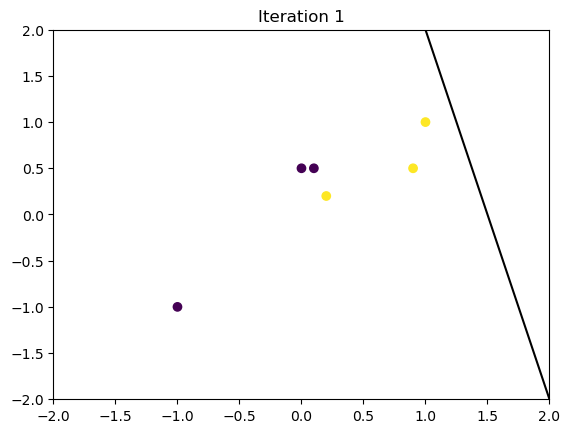


Iteration 2
Data point 1: Predicted class = -1, Actual class = 1, Updated weight vector = [ 2.25  1.5  -0.25]


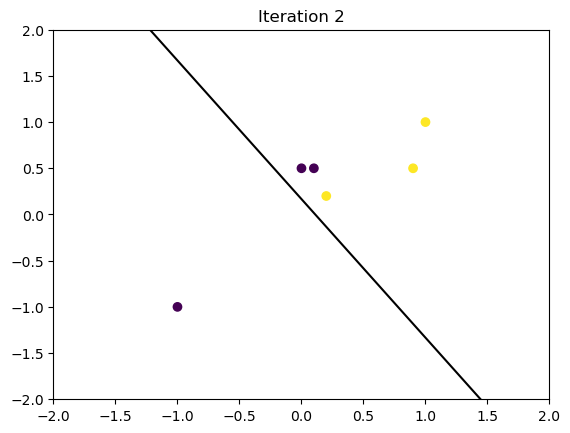


Iteration 3
Data point 1: Predicted class = 1, Actual class = 1, Updated weight vector = [ 2.25  1.5  -0.25]
Data point 2: Predicted class = -1, Actual class = -1, Updated weight vector = [ 2.25  1.5  -0.25]
Data point 3: Predicted class = 1, Actual class = -1, Updated weight vector = [ 2.25  0.75 -1.75]


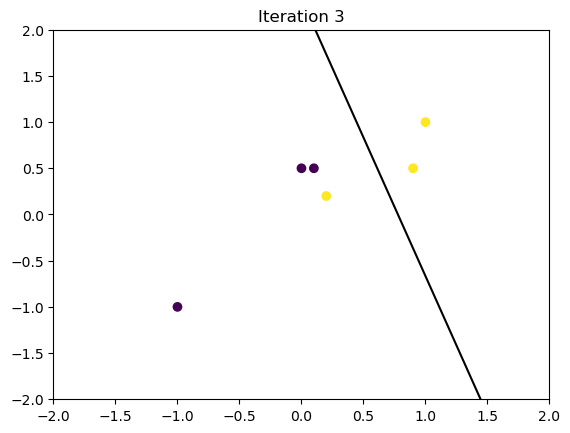


Iteration 4
Data point 1: Predicted class = 1, Actual class = 1, Updated weight vector = [ 2.25  0.75 -1.75]
Data point 2: Predicted class = -1, Actual class = -1, Updated weight vector = [ 2.25  0.75 -1.75]
Data point 3: Predicted class = -1, Actual class = -1, Updated weight vector = [ 2.25  0.75 -1.75]
Data point 4: Predicted class = -1, Actual class = -1, Updated weight vector = [ 2.25  0.75 -1.75]
Data point 5: Predicted class = -1, Actual class = 1, Updated weight vector = [2.68 1.18 0.4 ]


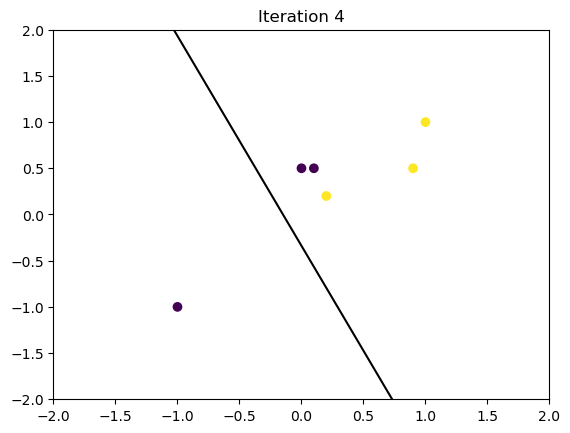


Iteration 5
Data point 1: Predicted class = 1, Actual class = 1, Updated weight vector = [2.68 1.18 0.4 ]
Data point 2: Predicted class = -1, Actual class = -1, Updated weight vector = [2.68 1.18 0.4 ]
Data point 3: Predicted class = 1, Actual class = -1, Updated weight vector = [ 2.68   0.185 -1.59 ]


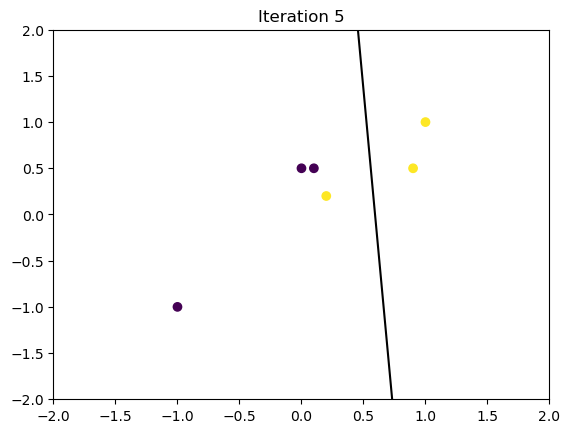


Iteration 6
Data point 1: Predicted class = 1, Actual class = 1, Updated weight vector = [ 2.68  0.19 -1.59]
Data point 2: Predicted class = -1, Actual class = -1, Updated weight vector = [ 2.68  0.19 -1.59]
Data point 3: Predicted class = -1, Actual class = -1, Updated weight vector = [ 2.68  0.19 -1.59]
Data point 4: Predicted class = -1, Actual class = -1, Updated weight vector = [ 2.68  0.19 -1.59]
Data point 5: Predicted class = -1, Actual class = 1, Updated weight vector = [3.0834 0.5884 0.427 ]


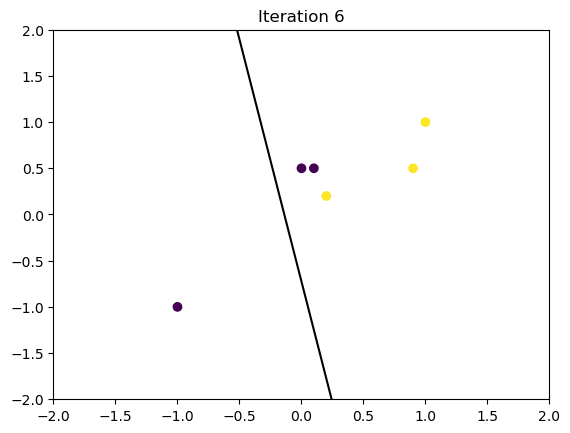


Iteration 7
Data point 1: Predicted class = 1, Actual class = 1, Updated weight vector = [3.08 0.59 0.43]
Data point 2: Predicted class = -1, Actual class = -1, Updated weight vector = [3.08 0.59 0.43]
Data point 3: Predicted class = 1, Actual class = -1, Updated weight vector = [ 3.0834 -0.2722 -1.2942]


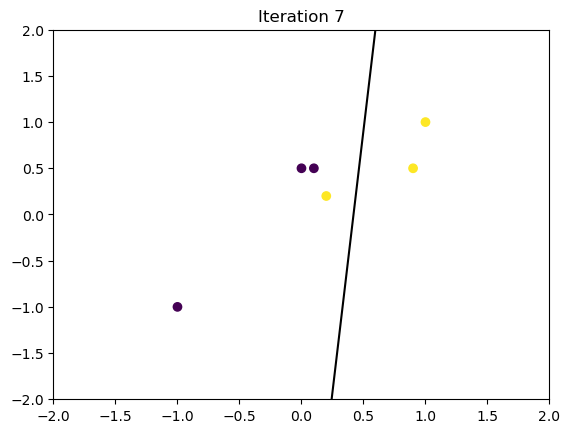


Iteration 8
Data point 1: Predicted class = 1, Actual class = 1, Updated weight vector = [ 3.08 -0.27 -1.29]
Data point 2: Predicted class = -1, Actual class = -1, Updated weight vector = [ 3.08 -0.27 -1.29]
Data point 3: Predicted class = -1, Actual class = -1, Updated weight vector = [ 3.08 -0.27 -1.29]
Data point 4: Predicted class = -1, Actual class = -1, Updated weight vector = [ 3.08 -0.27 -1.29]
Data point 5: Predicted class = -1, Actual class = 1, Updated weight vector = [3.429792 0.074192 0.43776 ]


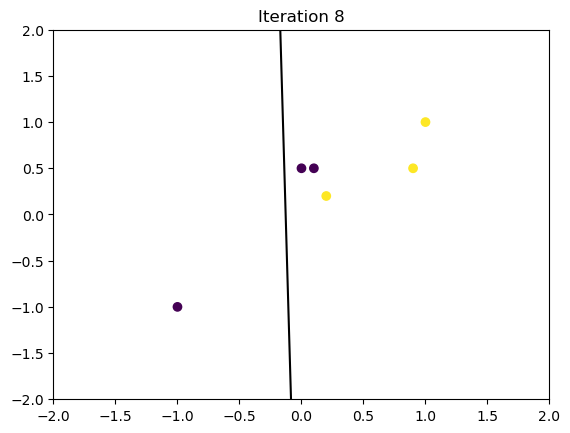


Iteration 9
Data point 1: Predicted class = 1, Actual class = 1, Updated weight vector = [3.43 0.07 0.44]
Data point 2: Predicted class = -1, Actual class = -1, Updated weight vector = [3.43 0.07 0.44]
Data point 3: Predicted class = 1, Actual class = -1, Updated weight vector = [ 3.429792 -0.663236 -1.037096]


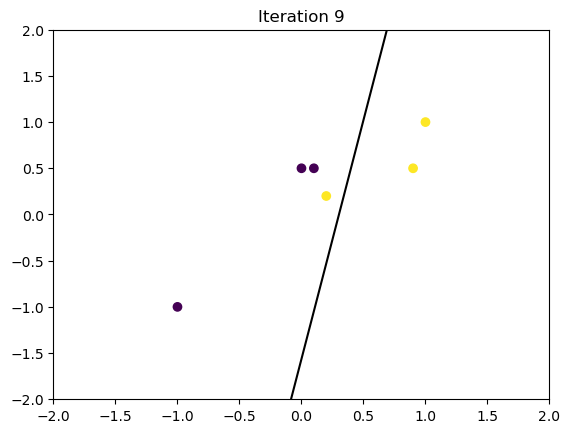


Iteration 10
Data point 1: Predicted class = 1, Actual class = 1, Updated weight vector = [ 3.43 -0.66 -1.04]
Data point 2: Predicted class = -1, Actual class = -1, Updated weight vector = [ 3.43 -0.66 -1.04]
Data point 3: Predicted class = -1, Actual class = -1, Updated weight vector = [ 3.43 -0.66 -1.04]
Data point 4: Predicted class = -1, Actual class = -1, Updated weight vector = [ 3.43 -0.66 -1.04]
Data point 5: Predicted class = -1, Actual class = 1, Updated weight vector = [ 3.72654896 -0.36647904  0.4466888 ]


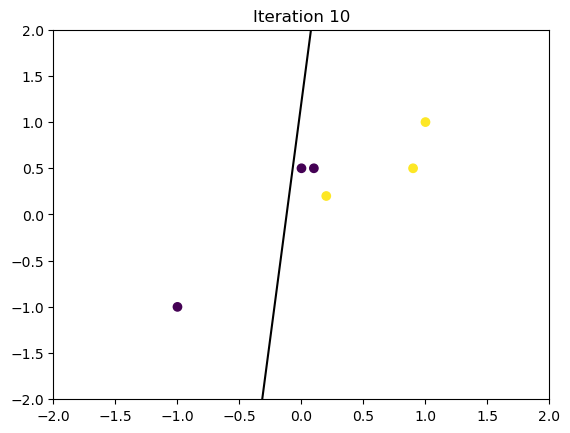


Iteration 11
Data point 1: Predicted class = 1, Actual class = 1, Updated weight vector = [ 3.73 -0.37  0.45]
Data point 2: Predicted class = -1, Actual class = -1, Updated weight vector = [ 3.73 -0.37  0.45]
Data point 3: Predicted class = 1, Actual class = -1, Updated weight vector = [ 3.72654896 -0.99820368 -0.81676048]


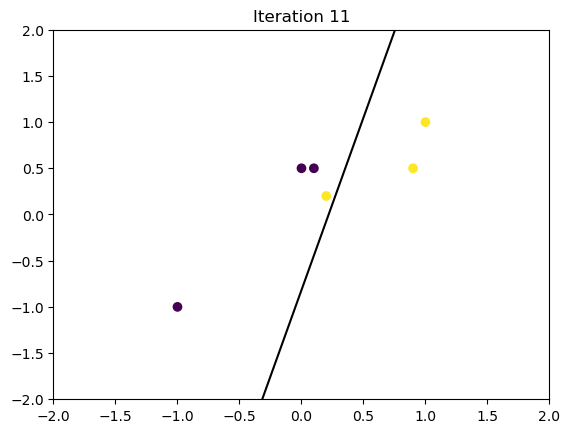


Iteration 12
Data point 1: Predicted class = 1, Actual class = 1, Updated weight vector = [ 3.73 -1.   -0.82]
Data point 2: Predicted class = -1, Actual class = -1, Updated weight vector = [ 3.73 -1.   -0.82]
Data point 3: Predicted class = -1, Actual class = -1, Updated weight vector = [ 3.73 -1.   -0.82]
Data point 4: Predicted class = -1, Actual class = -1, Updated weight vector = [ 3.73 -1.   -0.82]
Data point 5: Predicted class = -1, Actual class = 1, Updated weight vector = [ 3.98076724 -0.7439854   0.45433094]


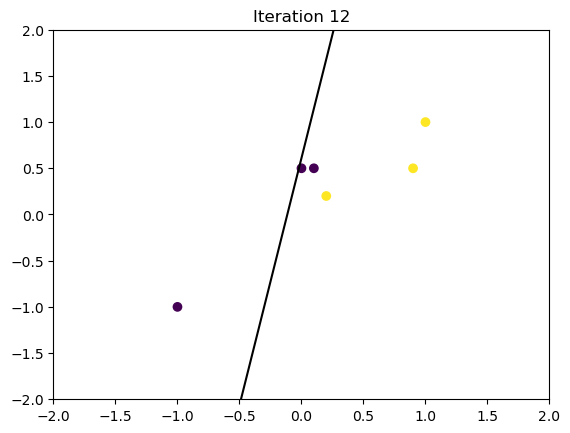


Iteration 13
Data point 1: Predicted class = 1, Actual class = 1, Updated weight vector = [ 3.98 -0.74  0.45]
Data point 2: Predicted class = -1, Actual class = -1, Updated weight vector = [ 3.98 -0.74  0.45]
Data point 3: Predicted class = 1, Actual class = -1, Updated weight vector = [ 3.98076724 -1.28515452 -0.6280073 ]


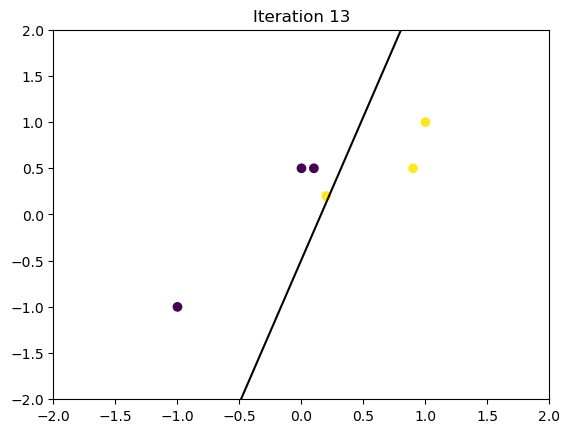


Iteration 14
Data point 1: Predicted class = 1, Actual class = 1, Updated weight vector = [ 3.98 -1.29 -0.63]
Data point 2: Predicted class = -1, Actual class = -1, Updated weight vector = [ 3.98 -1.29 -0.63]
Data point 3: Predicted class = -1, Actual class = -1, Updated weight vector = [ 3.98 -1.29 -0.63]
Data point 4: Predicted class = -1, Actual class = -1, Updated weight vector = [ 3.98 -1.29 -0.63]
Data point 5: Predicted class = -1, Actual class = 1, Updated weight vector = [ 4.1985442  -1.06737757  0.46087745]


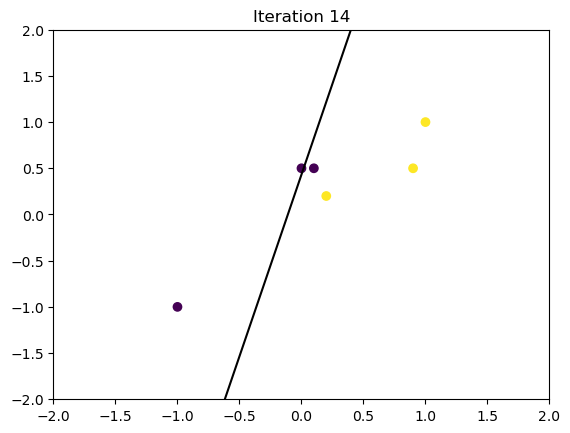


Iteration 15
Data point 1: Predicted class = 1, Actual class = 1, Updated weight vector = [ 4.2  -1.07  0.46]
Data point 2: Predicted class = -1, Actual class = -1, Updated weight vector = [ 4.2  -1.07  0.46]
Data point 3: Predicted class = -1, Actual class = -1, Updated weight vector = [ 4.2  -1.07  0.46]
Data point 4: Predicted class = 1, Actual class = -1, Updated weight vector = [ 4.06383989 -1.74089911 -0.88616564]


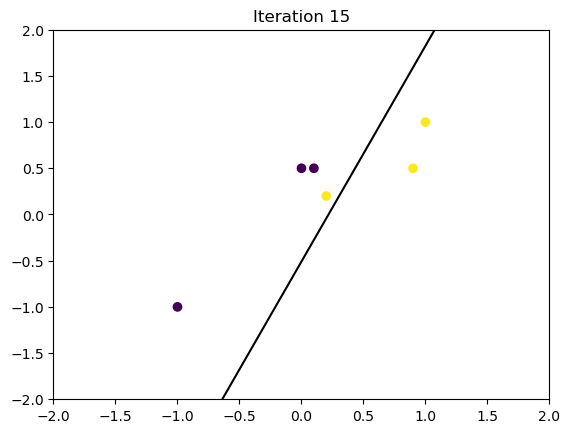


Iteration 16
Data point 1: Predicted class = 1, Actual class = 1, Updated weight vector = [ 4.06 -1.74 -0.89]
Data point 2: Predicted class = -1, Actual class = -1, Updated weight vector = [ 4.06 -1.74 -0.89]
Data point 3: Predicted class = -1, Actual class = -1, Updated weight vector = [ 4.06 -1.74 -0.89]
Data point 4: Predicted class = -1, Actual class = -1, Updated weight vector = [ 4.06 -1.74 -0.89]
Data point 5: Predicted class = -1, Actual class = 1, Updated weight vector = [ 4.34815538 -1.45658362  0.53541185]


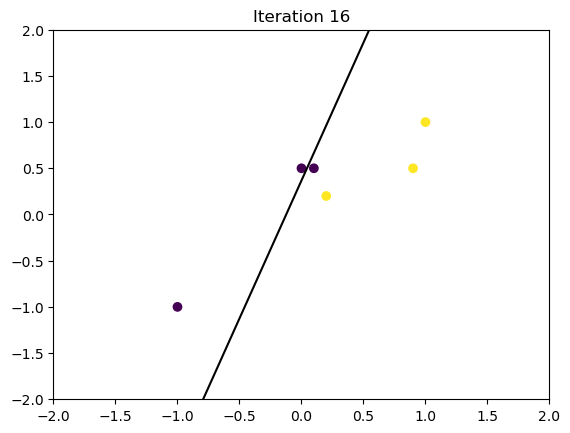


Iteration 17
Data point 1: Predicted class = 1, Actual class = 1, Updated weight vector = [ 4.35 -1.46  0.54]
Data point 2: Predicted class = -1, Actual class = -1, Updated weight vector = [ 4.35 -1.46  0.54]
Data point 3: Predicted class = -1, Actual class = -1, Updated weight vector = [ 4.35 -1.46  0.54]
Data point 4: Predicted class = 1, Actual class = -1, Updated weight vector = [ 4.22396183 -2.0775514  -0.70652373]


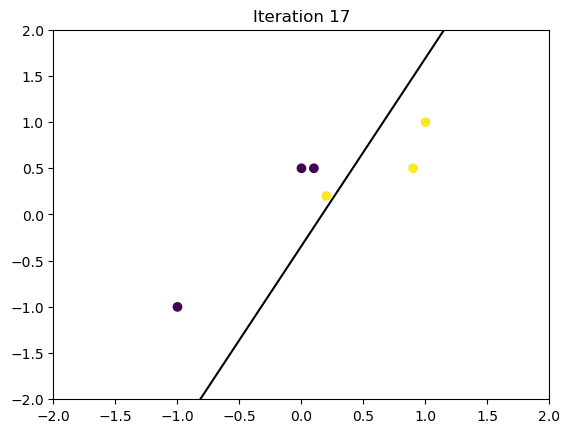


Iteration 18
Data point 1: Predicted class = 1, Actual class = 1, Updated weight vector = [ 4.22 -2.08 -0.71]
Data point 2: Predicted class = -1, Actual class = -1, Updated weight vector = [ 4.22 -2.08 -0.71]
Data point 3: Predicted class = -1, Actual class = -1, Updated weight vector = [ 4.22 -2.08 -0.71]
Data point 4: Predicted class = -1, Actual class = -1, Updated weight vector = [ 4.22 -2.08 -0.71]
Data point 5: Predicted class = -1, Actual class = 1, Updated weight vector = [ 4.47941016 -1.82210307  0.57071792]


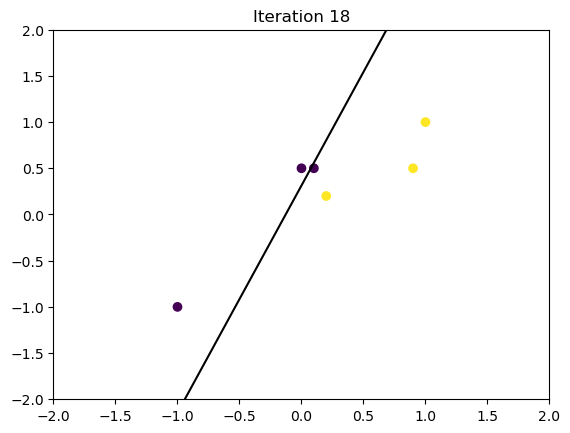


Iteration 19
Data point 1: Predicted class = 1, Actual class = 1, Updated weight vector = [ 4.48 -1.82  0.57]
Data point 2: Predicted class = -1, Actual class = -1, Updated weight vector = [ 4.48 -1.82  0.57]
Data point 3: Predicted class = -1, Actual class = -1, Updated weight vector = [ 4.48 -1.82  0.57]
Data point 4: Predicted class = 1, Actual class = -1, Updated weight vector = [ 4.36864942 -2.37590677 -0.53688948]


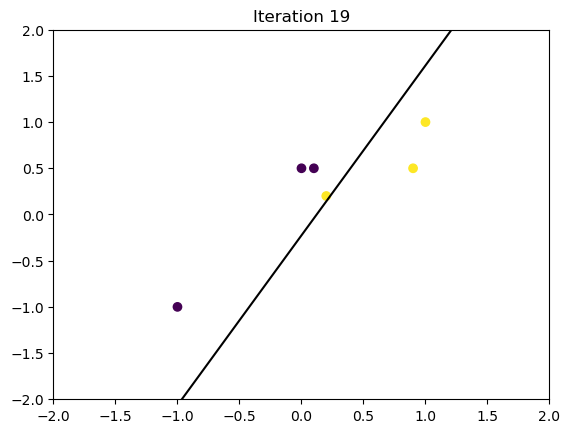


Iteration 20
Data point 1: Predicted class = 1, Actual class = 1, Updated weight vector = [ 4.37 -2.38 -0.54]
Data point 2: Predicted class = -1, Actual class = -1, Updated weight vector = [ 4.37 -2.38 -0.54]
Data point 3: Predicted class = -1, Actual class = -1, Updated weight vector = [ 4.37 -2.38 -0.54]
Data point 4: Predicted class = -1, Actual class = -1, Updated weight vector = [ 4.37 -2.38 -0.54]
Data point 5: Predicted class = -1, Actual class = 1, Updated weight vector = [ 4.59631761 -2.14823858  0.60145147]


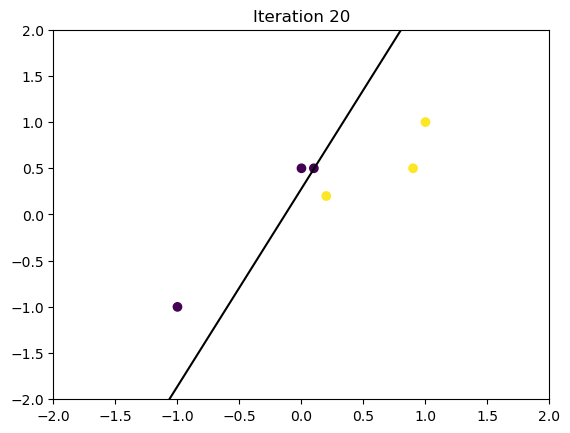


Iteration 21
Data point 1: Predicted class = 1, Actual class = 1, Updated weight vector = [ 4.6  -2.15  0.6 ]
Data point 2: Predicted class = -1, Actual class = -1, Updated weight vector = [ 4.6  -2.15  0.6 ]
Data point 3: Predicted class = -1, Actual class = -1, Updated weight vector = [ 4.6  -2.15  0.6 ]
Data point 4: Predicted class = -1, Actual class = -1, Updated weight vector = [ 4.6  -2.15  0.6 ]
Data point 5: Predicted class = 1, Actual class = 1, Updated weight vector = [ 4.6  -2.15  0.6 ]
Data point 6: Predicted class = 1, Actual class = 1, Updated weight vector = [ 4.6  -2.15  0.6 ]
The algorithm has converged after 21 passes through the data.
The final weight vector is: [ 4.5963 -2.1482  0.6015]

The equation of the decision boundary is: (4.596317605509257)x_1 + (-2.1482385816641894)*x_2 + (0.6014514711794805)*bais= 0


In [2]:
import numpy as np
import matplotlib.pyplot as plt

class Perceptron:
    def __init__(self, X, y, max_iter=50,alpha = 1):
        self.X = X
        self.X = np.concatenate((self.X, np.ones((len(X), 1))), axis=1)
        self.y = y
        self.alpha =alpha
        self.max_iter = max_iter
        self.w = np.array([1.0, 1.0, 0.0])
        self.b = 0.0

    def activation_function(self, y_hat):
        if y_hat >= 0:
            return 1
        else:
            return -1
    def predict(self, X):
        X = np.concatenate((X, np.ones((len(X), 1))), axis=1)
        y_hat = np.dot(X, self.w)
        y_hat[y_hat >= 0] = 1
        y_hat[y_hat < 0] = -1
        return y_hat

    def accuracy(self, X, y):
        y_pred = self.predict(X)
        return np.mean(y_pred == y)
    def fit(self):
        for i in range(self.max_iter):
            print(f'\nIteration {i + 1}')
            errors = 0
            for j in range(len(self.X)):
                x = self.X[j]
                target = self.y[j]
                y_hat = np.dot(self.w.T, x)
                output = self.activation_function(y_hat)
                if output != target:
                    self.w += self.alpha * (self.y[j]-y_hat) * x
                    self.b += self.alpha * (self.y[j]-y_hat)
                    errors += 1
                    print(f"Data point {j + 1}: Predicted class = {output}, Actual class = {target}, Updated weight vector = {self.w}")
                    self.plot_boundary(i + 1)
                    break
                print(f"Data point {j + 1}: Predicted class = {output}, Actual class = {target}, Updated weight vector = {np.round(self.w,2)}") 
            if errors == 0:
                print('\033[1m' + f"The algorithm has converged after {i + 1} passes through the data." + '\033[0m')
                break

    def plot_boundary(self, i):
        xx, yy = np.meshgrid(np.linspace(-2, 2, 10), np.linspace(-2, 2, 10))
        grid = np.c_[xx.ravel(), yy.ravel(), np.ones(xx.ravel().shape[0])]
        Z = np.dot(grid, self.w)
        Z[Z >= 0] = 1
        Z[Z < 0] = -1
        Z = Z.reshape(xx.shape)
        plt.figure()
        plt.scatter(self.X[:, 0], self.X[:, 1], c=self.y)
        plt.plot([-2, 2], [(-self.w[2] - self.w[0]*(-2))/self.w[1], (-self.w[2] - self.w[0]*(2))/self.w[1]], color='black')
        plt.xlim(-2, 2)
        plt.ylim(-2, 2)
        plt.title(f'Iteration {i}')
        plt.show()

    def print_final_weights(self):
        print(f"The final weight vector is: {np.round(self.w,4)}\n")

    def print_decision_boundary_equation(self):
        w1 = self.w[0]
        w2 = self.w[1]
        bais = self.w[2]
        
        print('\033[1m' + f"The equation of the decision boundary is: ({w1})x_1 + ({w2})*x_2 + ({bais})*bais= 0" + '\033[0m')

# Data
X = np.array([[1, 1],
              [-1, -1],
              [0, 0.5],
              [0.1, 0.5],
              [0.2, 0.2],
              [0.9, 0.5]])
y = np.array([1, -1, -1, -1, 1, 1])

#Instantiate Perceptron object
perceptron = Perceptron(X, y)

#Train the Perceptron
perceptron.fit()

#Print the final weight vector and decision boundary equation
perceptron.print_final_weights()
perceptron.print_decision_boundary_equation()



In [ ]:
# Evaluate accuracy on the training data
acc_train = perceptron.accuracy(X, y)
print(f"Accuracy on training data: {acc_train:.2%}")

***All three algorithms have the same accuracy and are producing decision boundaries that correctly classify all the data points with maximum learning rate, But considering the algorithm that has Normalized data using Mean Centring and using w +/- X has fewest iterations (9 iterations) and has the simplest decision boundary equation. Therefore, algorithm 2 would be the best choice among the three accordingly to anlaysis***

****
